In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [74]:
data = pd.read_csv(r'bank-additional-full-EDA.csv', header=0, sep = ',')
df = pd.read_csv(r'bank-additional-full-EDA.csv', header=0, sep = ',')
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Date,emp.var.rate,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,93.994,-36.4,4.857,5191.0,no,May 2008,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,93.994,-36.4,4.857,5191.0,no,May 2008,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,93.994,-36.4,4.857,5191.0,no,May 2008,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,93.994,-36.4,4.857,5191.0,no,May 2008,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,93.994,-36.4,4.857,5191.0,no,May 2008,0,1


In [50]:
# Target variable 
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

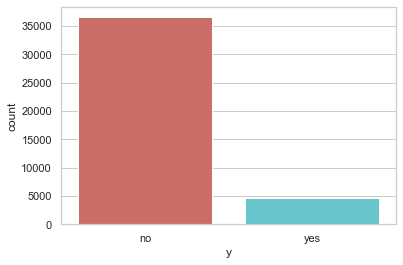

<Figure size 432x288 with 0 Axes>

In [51]:
sns.countplot(x='y', data = data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [52]:
count_no_sub = len(data[data['y']=='no'])
count_sub = len(data[data['y']=='yes'])

pct_of_sub = count_sub/(count_no_sub+count_sub)
print('The percentage of customers who do subscribe to term loans:  %.2f%%' % (pct_of_sub*100))
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print('The percentage of customers who do not subscribe to term loans:  %.2f%%' % (pct_of_no_sub*100))

The percentage of customers who do subscribe to term loans:  11.27%
The percentage of customers who do not subscribe to term loans:  88.73%


In [53]:
# Group by analysis

data.groupby('y').mean()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,emp.var.rate,poutcome
y,,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,93.603757,-40.593097,3.811491,5176.166600,0.279003,0.900213
yes,40.913147,553.191164,2.051724,792.035560,0.492672,93.354386,-39.789784,2.123135,5095.115991,0.711422,0.869612


In [54]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,emp.var.rate,poutcome
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,93.534054,-40.245433,3.550274,5164.125350,0.344847,0.895318
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,93.656656,-41.375816,3.771996,5175.615150,0.300627,0.904258
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,93.605372,-41.283654,3.791120,5176.313530,0.267857,0.894231
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,93.676576,-39.495283,4.009645,5179.529623,0.222642,0.930189
management,42.362859,257.058140,2.476060,962.647059,0.185021,93.522755,-40.489466,3.611316,5166.650513,0.310876,0.886799
retired,62.027326,273.712209,2.476744,897.936047,0.327326,93.430786,-38.573081,2.770066,5122.262151,0.537209,0.866279
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,93.559982,-40.488107,3.689376,5170.674384,0.301900,0.897959
services,37.926430,258.398085,2.587805,979.974049,0.154951,93.634659,-41.290048,3.699187,5171.600126,0.314689,0.887125
student,25.894857,283.683429,2.104000,840.217143,0.524571,93.331613,-40.187543,1.884224,5085.939086,0.779429,0.813714


In [55]:
 data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,emp.var.rate,poutcome
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,93.606563,-40.707069,3.715603,5170.878643,0.298786,0.891154
married,42.307165,257.438623,2.57281,967.247673,0.155608,93.597367,-40.270659,3.745832,5171.848772,0.294207,0.904365
single,33.158714,261.524378,2.53380,949.909578,0.211359,93.517300,-40.918698,3.317447,5155.199265,0.410875,0.883039
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,93.471250,-40.820000,3.313037,5157.393750,0.412500,0.837500


In [56]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,emp.var.rate,poutcome
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,93.658309,-40.239871,3.751768,5170.124880,0.297174,0.915230
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,93.650062,-41.127880,3.772942,5174.718063,0.297557,0.904887
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,93.623399,-41.326749,3.697963,5172.294012,0.314806,0.895782
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,93.584857,-40.940641,3.556157,5164.994735,0.347031,0.882396
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,93.317333,-39.950000,3.516556,5171.777778,0.333333,0.944444
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,93.569864,-40.124108,3.710457,5170.155979,0.303834,0.904063
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,93.493466,-39.975805,3.529663,5163.226298,0.343935,0.897929
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,93.658615,-39.877816,3.571098,5159.549509,0.338533,0.893125


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B1C86F0688>,
      dtype=object)

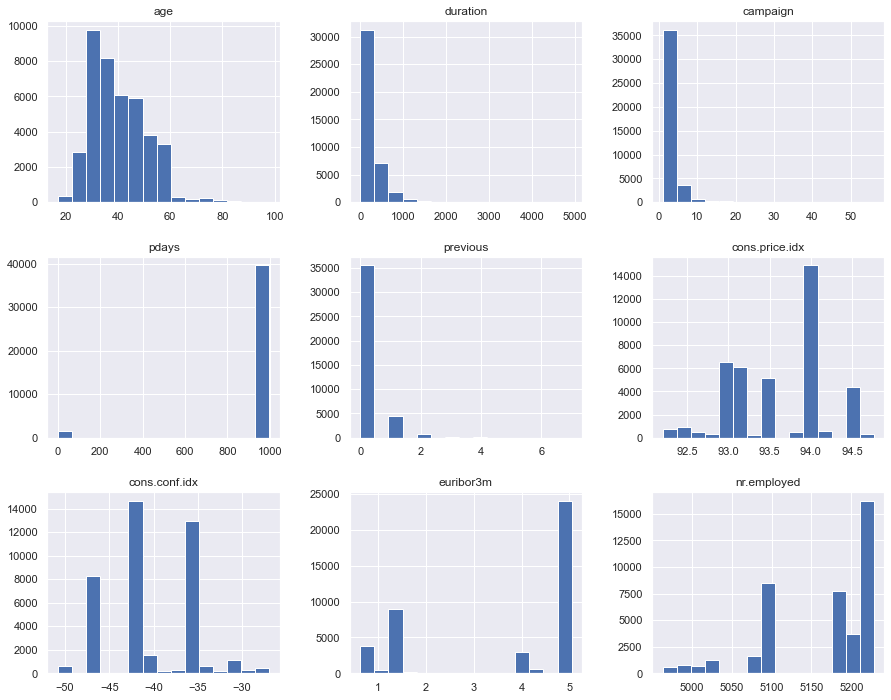

In [57]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# histograms for numerical variables
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
sns.set(style = 'darkgrid', palette = 'deep')
df[numerical].hist(bins = 15, figsize = (15, 12), layout = (3, 3))

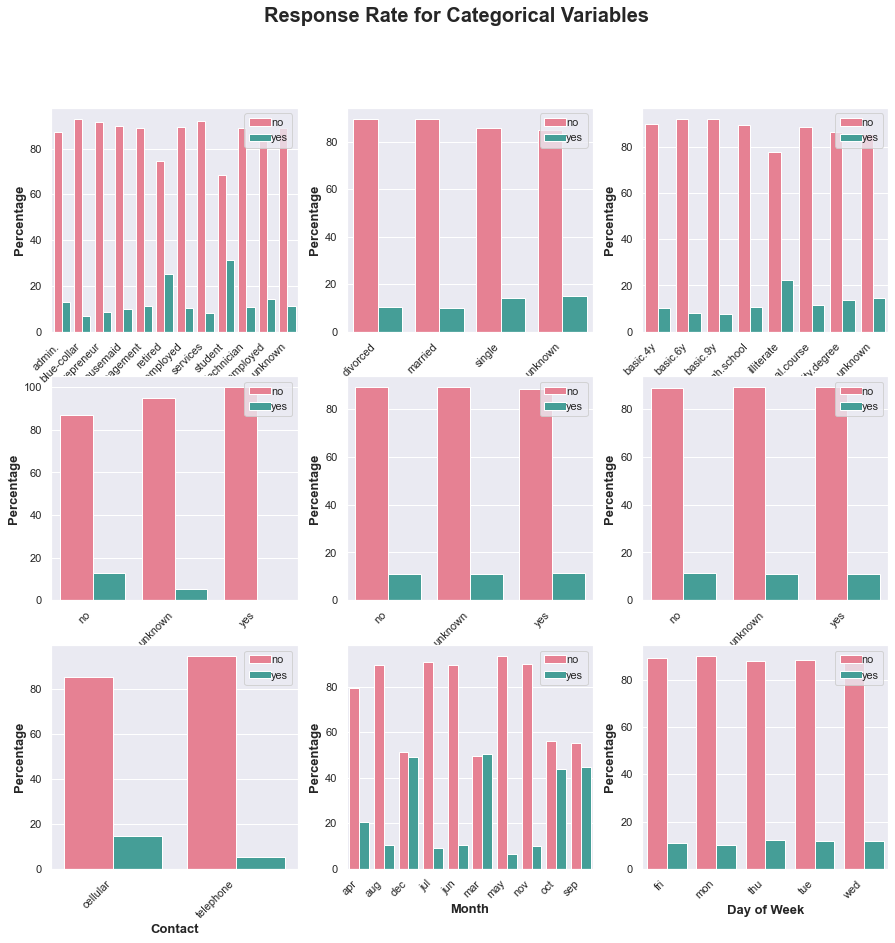

In [58]:
# examine response rate of categorical variables

# create the subplot
fig, ax = plt.subplots(3, 3, figsize = (15, 14), sharey = False)
# flatten axes for 2D object
axes = ax.flatten()
# figure title
fig.suptitle('Response Rate for Categorical Variables', fontsize = 20, fontweight = 'bold')

# barplot for job
job_counts = (df.groupby(['job'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('job'))
job = sns.barplot(x = 'job', y = 'percentage', hue = 'y', data = job_counts, palette = 'husl', ax = axes[0])
job.set_xticklabels(job.get_xticklabels(), rotation = 45, ha = 'right')
#job.set(xlabel = 'Job', ylabel = 'Percentage')
job.set_xlabel('Job', fontsize = 13, fontweight = "bold")
job.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
job.legend(handletextpad = 0,loc = 'upper right')

# barplot for marital status
marital_counts = (df.groupby(['marital'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('marital'))
marital = sns.barplot(x = 'marital', y = 'percentage', hue = 'y', data = marital_counts, palette = 'husl', ax = axes[1])
marital.set_xticklabels(marital.get_xticklabels(), rotation = 45, ha = 'right')
marital.set_xlabel('Marital', fontsize = 13, fontweight = "bold")
marital.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
marital.legend(handletextpad = 0,loc = 'upper right')

# barplot for education level
education_counts = (df.groupby(['education'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('education'))
education = sns.barplot(x = 'education', y = 'percentage', hue = 'y', data = education_counts, palette = 'husl', ax = axes[2])
education.set_xticklabels(education.get_xticklabels(), rotation = 45, ha = 'right')
education.set_xlabel('Education', fontsize = 13, fontweight = "bold")
education.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
education.legend(handletextpad = 0,loc = 'upper right')

# barplot for loan default
default_counts = (df.groupby(['default'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('default'))
default = sns.barplot(x = 'default', y = 'percentage', hue = 'y', data = default_counts, palette = 'husl', ax = axes[3])
default.set_xticklabels(default.get_xticklabels(), rotation = 45, ha = 'right')
default.set_xlabel('Default', fontsize = 13, fontweight = "bold")
default.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
default.legend(handletextpad = 0,loc = 'upper right')

# barplot for housing loan
housing_counts = (df.groupby(['housing'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('housing'))
housing = sns.barplot(x = 'housing', y = 'percentage', hue = 'y', data = housing_counts, palette = 'husl', ax = axes[4])
housing.set_xticklabels(housing.get_xticklabels(), rotation = 45, ha = 'right')
housing.set_xlabel('Housing', fontsize = 13, fontweight = "bold")
housing.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
housing.legend(handletextpad = 0,loc = 'upper right')

# barplot for loan
loan_counts = (df.groupby(['loan'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('loan'))
loan = sns.barplot(x = 'loan', y = 'percentage', hue = 'y', data = loan_counts, palette = 'husl', ax = axes[5])
loan.set_xticklabels(loan.get_xticklabels(), rotation = 45, ha = 'right')
loan.set_xlabel('Loan', fontsize = 13, fontweight = "bold")
loan.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
loan.legend(handletextpad = 0,loc = 'upper right')

# barplot for contact type
contact_counts = (df.groupby(['contact'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('contact'))
contact = sns.barplot(x = 'contact', y = 'percentage', hue = 'y', data = contact_counts, palette = 'husl', ax = axes[6])
contact.set_xticklabels(contact.get_xticklabels(), rotation = 45, ha = 'right')
contact.set_xlabel('Contact', fontsize = 13, fontweight = "bold")
contact.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
contact.legend(handletextpad = 0,loc = 'upper right')

# barplot for month contacted
month_counts = (df.groupby(['month'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('month'))
month = sns.barplot(x = 'month', y = 'percentage', hue = 'y', data = month_counts, palette = 'husl', ax = axes[7])
month.set_xticklabels(month.get_xticklabels(), rotation = 45, ha = 'right')
month.set_xlabel('Month', fontsize = 13, fontweight = "bold")
month.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
month.legend(handletextpad = 0,loc = 'upper right')


# barplot for day of week contacted
day_of_week_counts = (df.groupby(['day_of_week'])['y']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('day_of_week'))
day_of_week = sns.barplot(x = 'day_of_week', y = 'percentage', hue = 'y', data = day_of_week_counts, palette = 'husl', 
                          ax = axes[8])
day_of_week.set_xticklabels(day_of_week.get_xticklabels(), rotation = 45, ha = 'right')
day_of_week.set_xlabel('Day of Week', fontsize = 13, fontweight = "bold")
day_of_week.set_ylabel('Percentage', fontsize = 13, fontweight = "bold")
day_of_week.legend(handletextpad = 0,loc = 'upper right')

Text(0, 0.5, 'Number Employed')

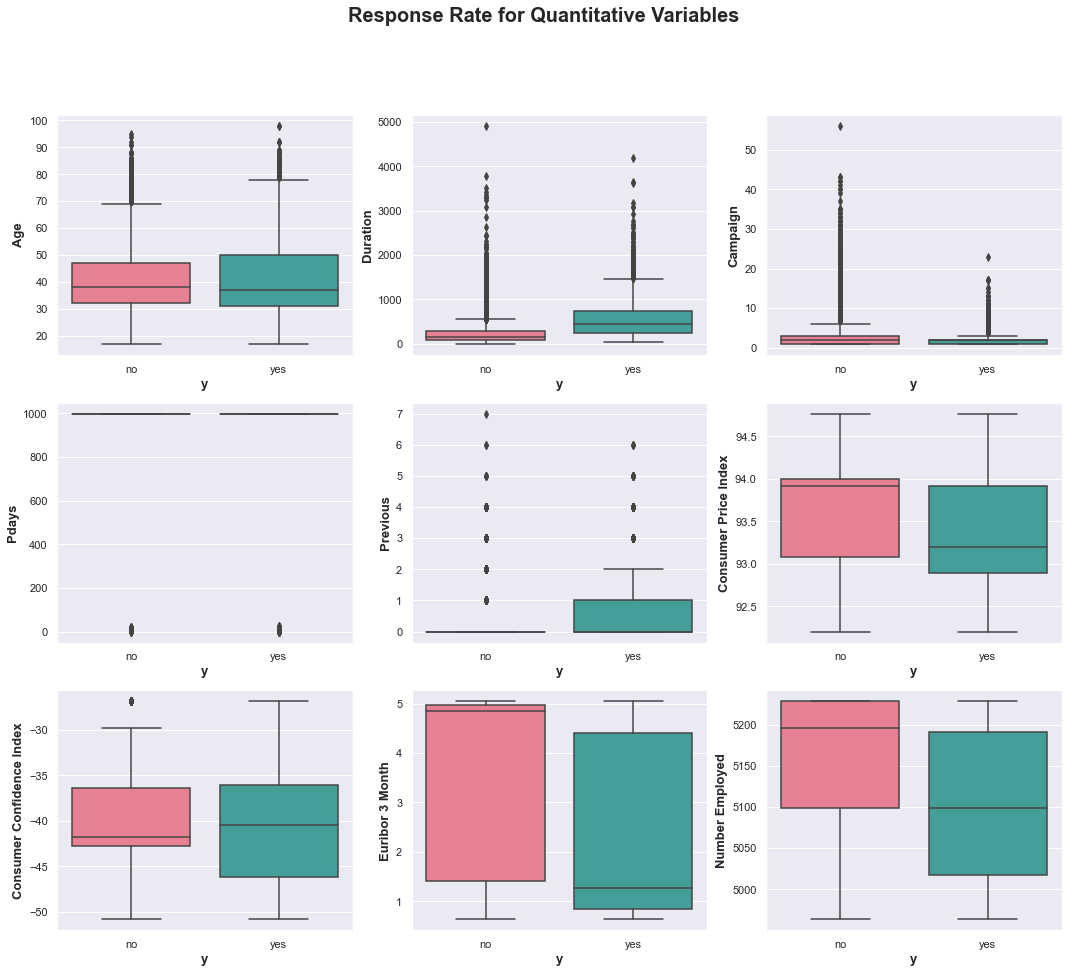

In [59]:
# examine response rate of quantitative variables
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
# figure title
fig.suptitle('Response Rate for Quantitative Variables', fontsize = 20, fontweight = 'bold')

# boxplot for age
age = sns.boxplot(ax = axes[0, 0], data = df, x = 'y', y = 'age', palette = 'husl')
age.set_xlabel('y', fontsize = 13, fontweight = "bold")
age.set_ylabel('Age', fontsize = 13, fontweight = "bold")

# boxplot for duration
duration = sns.boxplot(ax = axes[0, 1], data = df, x = 'y', y = 'duration', palette = 'husl')
duration.set_xlabel('y', fontsize = 13, fontweight = "bold")
duration.set_ylabel('Duration', fontsize = 13, fontweight = "bold")

# boxplot for campaign
campaign = sns.boxplot(ax = axes[0, 2], data = df, x = 'y', y = 'campaign', palette = 'husl')
campaign.set_xlabel('y', fontsize = 13, fontweight = "bold")
campaign.set_ylabel('Campaign', fontsize = 13, fontweight = "bold")

# boxplot for pdays
pdays = sns.boxplot(ax = axes[1, 0], data = df, x = 'y', y = 'pdays', palette = 'husl')
pdays.set_xlabel('y', fontsize = 13, fontweight = "bold")
pdays.set_ylabel('Pdays', fontsize = 13, fontweight = "bold")

# boxplot for previous
previous = sns.boxplot(ax = axes[1, 1], data = df, x = 'y', y = 'previous', palette = 'husl')
previous.set_xlabel('y', fontsize = 13, fontweight = "bold")
previous.set_ylabel('Previous', fontsize = 13, fontweight = "bold")

# boxplot for cons.price.idx
conspriceidx = sns.boxplot(ax = axes[1, 2], data = df, x = 'y', y = 'cons.price.idx', palette = 'husl')
conspriceidx.set_xlabel('y', fontsize = 13, fontweight = "bold")
conspriceidx.set_ylabel('Consumer Price Index', fontsize = 13, fontweight = "bold")

# boxplot for cons.conf.idx
consconfidx = sns.boxplot(ax = axes[2, 0], data = df, x = 'y', y = 'cons.conf.idx', palette = 'husl')
consconfidx.set_xlabel('y', fontsize = 13, fontweight = "bold")
consconfidx.set_ylabel('Consumer Confidence Index', fontsize = 13, fontweight = "bold")

# boxplot for euribor3m
euribor3m = sns.boxplot(ax = axes[2, 1], data = df, x = 'y', y = 'euribor3m', palette = 'husl')
euribor3m.set_xlabel('y', fontsize = 13, fontweight = "bold")
euribor3m.set_ylabel('Euribor 3 Month', fontsize = 13, fontweight = "bold")

# boxplot for nr.employed
nremployed = sns.boxplot(ax = axes[2, 2], data = df, x = 'y', y = 'nr.employed', palette = 'husl')
nremployed.set_xlabel('y', fontsize = 13, fontweight = "bold")
nremployed.set_ylabel('Number Employed', fontsize = 13, fontweight = "bold")

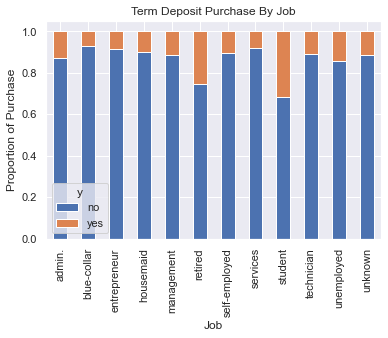

In [60]:
# Categorical variables: job 

table = pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Job')
plt.xlabel('Job')
plt.ylabel('Proportion of Purchase')
plt.savefig('purchase_vs_job')

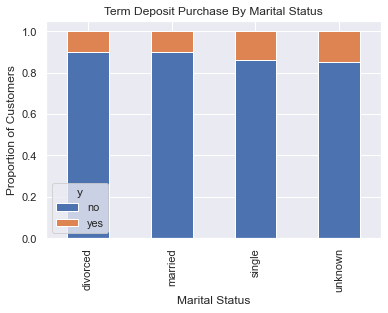

In [61]:
# Categorical variables: marital status

table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

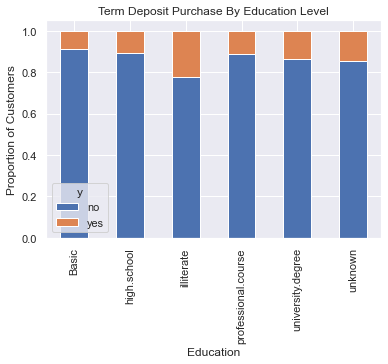

In [62]:
# Categorical variables: education 

data['education'] = np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] =='basic.4y', 'Basic', data['education'])

table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Education Level')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

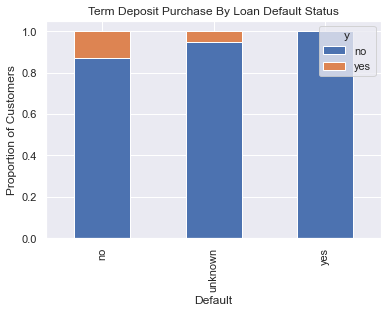

In [63]:
# Categorical variables: default

table = pd.crosstab(data.default,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Loan Default Status')
plt.xlabel('Default')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

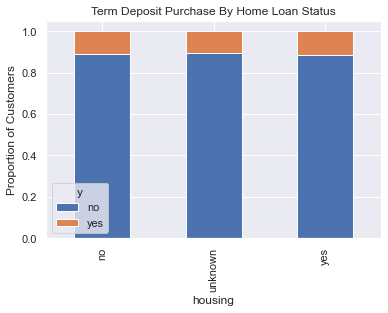

In [64]:
# Categorical variables: housing

table = pd.crosstab(data.housing,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Home Loan Status')
plt.xlabel('housing')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

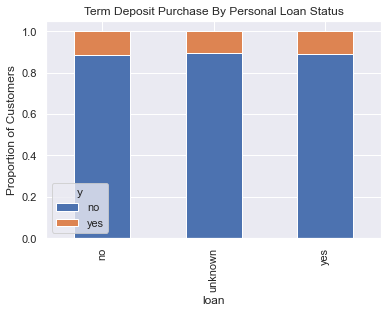

In [65]:
# Categorical variables: loan

table = pd.crosstab(data.loan,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked=True)
plt.title('Term Deposit Purchase By Personal Loan Status')
plt.xlabel('loan')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

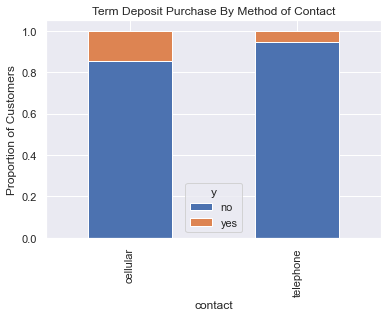

In [66]:
# Categorical variables: contact

table = pd.crosstab(data.contact,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Method of Contact')
plt.xlabel('contact')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

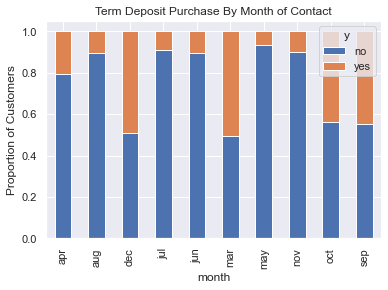

In [67]:
# Categorical variables: month

table = pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Month of Contact')
plt.xlabel('month')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

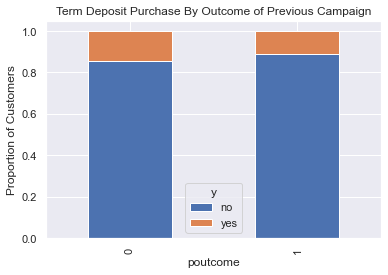

In [68]:
# Categorical variables: poutcome

table = pd.crosstab(data.poutcome,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Outcome of Previous Campaign')
plt.xlabel('poutcome')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

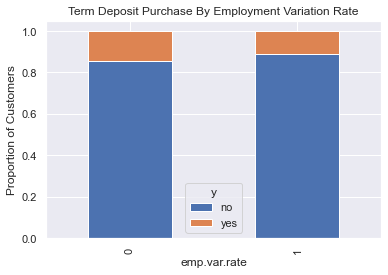

In [69]:
# Categorical variables: emp.var.rate

table = pd.crosstab(data.poutcome,data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Term Deposit Purchase By Employment Variation Rate')
plt.xlabel('emp.var.rate')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

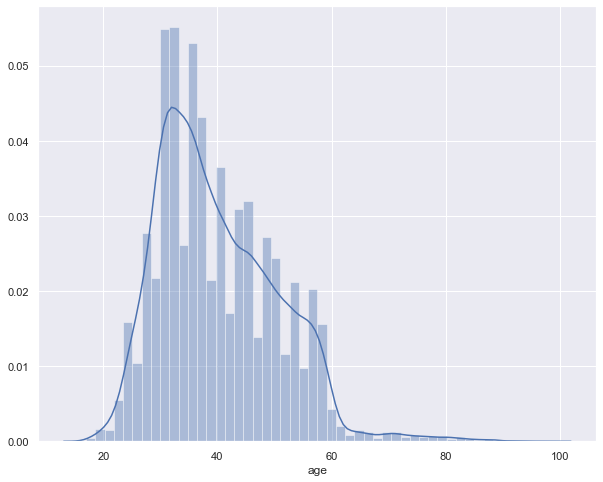

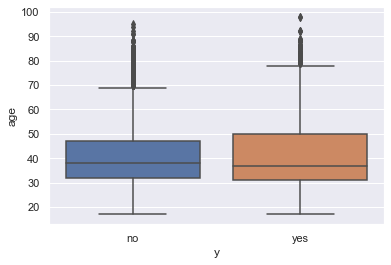

In [70]:
# Quantitative variables: age

plt.figure(figsize = (10,8))
sns.distplot(data['age'])
plt.show()

sns.boxplot(data = data, x = 'y', y = 'age')
plt.show()

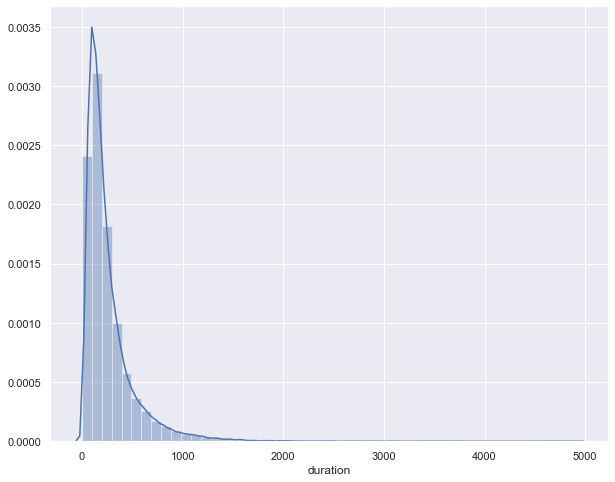

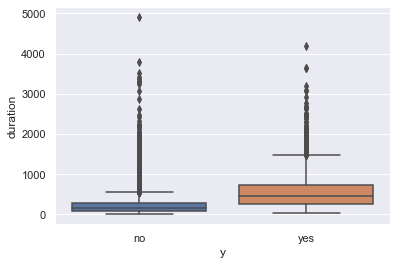

In [71]:
# Quantitative variables: duration

plt.figure(figsize = (10,8))
sns.distplot(data['duration'])
plt.show()

sns.boxplot(data = data, x = 'y', y = 'duration')
plt.show()

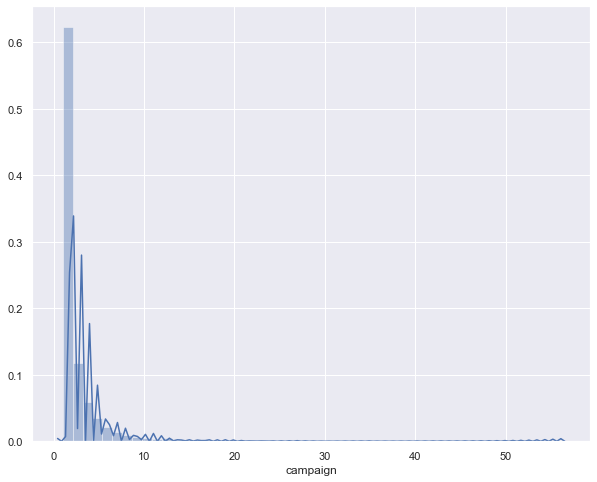

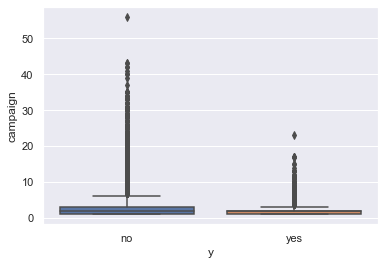

In [72]:
# Quantitative variables: duration

plt.figure(figsize = (10,8))
sns.distplot(data['campaign'])
plt.show()

sns.boxplot(data = data, x = 'y', y = 'campaign')
plt.show()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


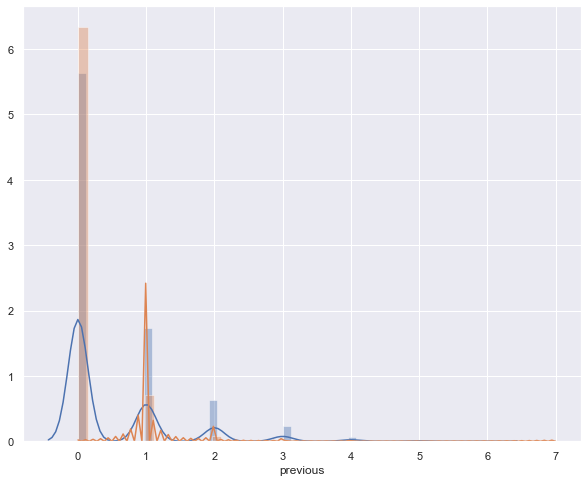

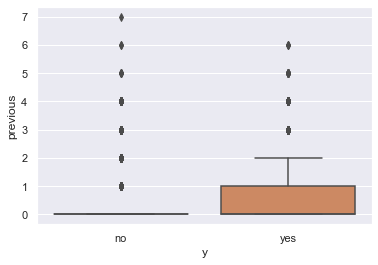

In [73]:
# Quantitative variables: previous

print(data['previous'].value_counts())

plt.figure(figsize=(10,8))
sns.distplot(data[data['y'] == 'yes']['previous'])
sns.distplot(data[data['y'] == 'no']['previous'])
plt.show()

sns.boxplot(data = data, x = 'y', y = 'previous')
plt.show()